<h1>Machine Learning - Housing Prices | Regression</h1><br>
<h2>Done By: Brian Tham</h2>
<h2>Check out my other projects on:</h2> 

[briantham.io](https://briantham.io)

<h3>About this Dataset</h3><br>
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import scipy.stats as st
# Suppress Future Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
print(df.shape)
print(df.nunique())

(21613, 21)
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [48]:
df.corr()

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,...,Bedrooms_3,Bedrooms_4,Bedrooms_5,Bedrooms_6,Bedrooms_7,Bedrooms_8,Bedrooms_9,Bedrooms_10,Bedrooms_11,Bedrooms_33
price,1.000000,0.518912,0.702035,0.089661,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,...,-0.183648,0.177489,0.189925,0.087776,0.046995,0.037755,0.016064,0.008962,-0.000372,0.001851
bathrooms,0.518912,1.000000,0.701784,0.089988,0.599360,0.334909,0.377433,0.069322,-0.144088,0.049235,...,-0.166878,0.232540,0.265175,0.146150,0.091757,0.050548,0.050171,0.019878,0.008475,-0.000529
sqft_living,0.702035,0.701784,1.000000,0.172826,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,...,-0.272404,0.353317,0.298006,0.148055,0.086562,0.045947,0.030756,0.020870,0.006815,-0.003406
sqft_lot,0.089661,0.089988,0.172826,1.000000,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,...,-0.015255,0.026631,0.011350,0.009485,0.005809,-0.003634,-0.003873,-0.001777,-0.001666,-0.001496
sqft_above,0.605567,0.599360,0.876597,0.183512,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,...,-0.224832,0.338346,0.211493,0.096252,0.069528,0.025845,0.023074,0.009509,0.005024,-0.006148
sqft_basement,0.323816,0.334909,0.435043,0.015286,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,...,-0.144622,0.100140,0.222709,0.127151,0.049542,0.046992,0.020652,0.025518,0.004742,0.004434
yr_built,0.054012,0.377433,0.318049,0.053080,0.423898,-0.133124,1.000000,-0.224874,-0.346869,-0.148122,...,0.025095,0.130070,0.030812,-0.030627,-0.011663,-0.012276,-0.022318,-0.004548,-0.012275,-0.005559
yr_renovated,0.126434,0.069322,0.055363,0.007644,0.023285,0.071323,-0.224874,1.000000,0.064357,0.029398,...,-0.019092,0.004612,0.011731,0.023658,0.013192,-0.005155,0.010396,-0.002476,0.032424,-0.001429
zipcode,-0.053203,-0.144088,-0.199430,-0.129574,-0.261190,0.074845,-0.346869,0.064357,1.000000,0.267048,...,-0.024937,-0.104634,-0.040980,0.003215,0.006178,0.001791,0.010193,-0.008722,0.003567,0.003186
lat,0.307003,0.049235,0.052529,-0.085683,-0.000816,0.110538,-0.148122,0.029398,0.267048,1.000000,...,-0.056487,-0.019408,0.028817,0.016596,0.014833,0.012386,0.011150,0.003967,-0.000199,0.006271


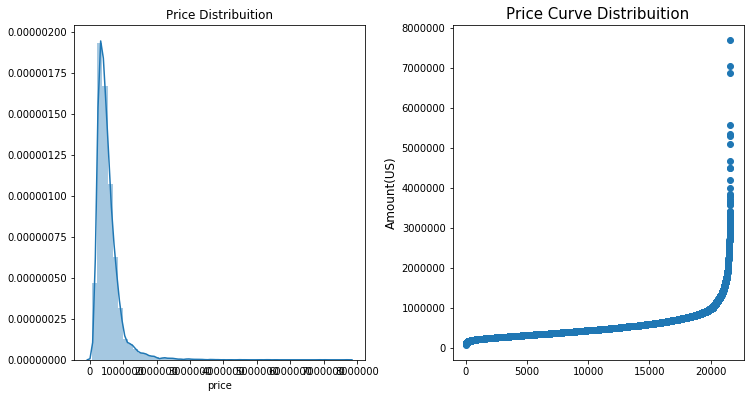

In [6]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Price Distribuition')
sns.distplot(df['price'])

plt.subplot(122)
g1 = plt.scatter(range(df.shape[0]), np.sort(df.price.values))
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

In [7]:
print("Price Min")
print(df['price'].min())
print("Price Mean")
print(df['price'].mean())
print("Price Median")
print(df['price'].median())
print("Price Max")
print(df['price'].max())
print("Price Std")
print(df['price'].std())

Price Min
75000.0
Price Mean
540088.1417665294
Price Median
450000.0
Price Max
7700000.0
Price Std
367127.1964826997


<Figure size 576x360 with 0 Axes>

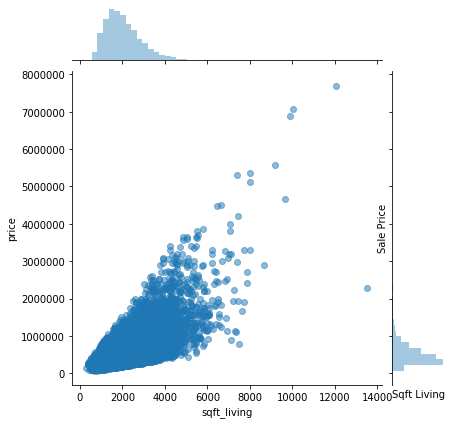

In [8]:
plt.figure(figsize = (8, 5))
sns.jointplot(df.sqft_living, df.price, 
              alpha = 0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

Condition counting: 
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64


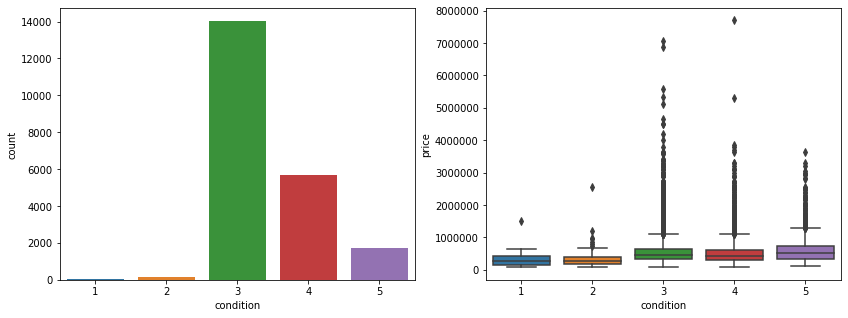

In [9]:
condition = df['condition'].value_counts()

print("Condition counting: ")
print(condition)

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sns.countplot(x='condition', data=df, ax=ax[0])
sns.boxplot(x='condition', y= 'price',
            data=df, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

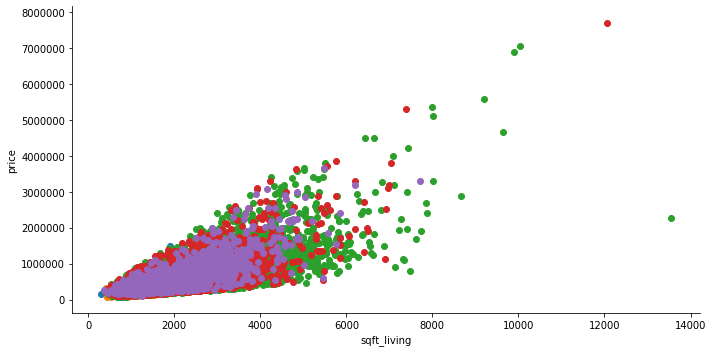

In [10]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=df, hue='condition',height= 5, aspect=2)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

<h1>Exploring bathrooms columns by price and conditions

Freuency bathroom description:
2    13851
1     3933
3     2527
4     1201
5       57
6       24
0       14
8        4
7        2
Name: bathrooms, dtype: int64


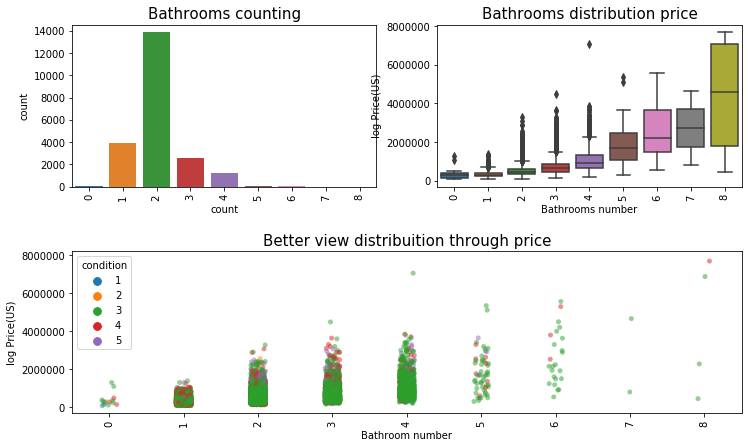

In [11]:
df["bathrooms"] = df['bathrooms'].round(0).astype(int)

print("Freuency bathroom description:")
print(df["bathrooms"].value_counts())

plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.countplot(x="bathrooms", data=df,
                    ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Bathrooms counting", fontsize=15)
ax1.set_xlabel("Bathrooms number")
ax1.set_xlabel("count")

ax2 = plt.subplot(222)
ax2 = sns.boxplot(x="bathrooms", y='price',
                  data=df, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Bathrooms distribution price", fontsize=15)
ax2.set_xlabel("Bathrooms number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.stripplot(x="bathrooms", y="price",
                    data=df, alpha=0.5,
                    jitter=True, hue="condition")
ax0.set_title("Better view distribuition through price", fontsize=15)
ax0.set_xlabel("Bathroom number")
ax0.set_ylabel("log Price(US)")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)

plt.show()

Mean squared error: 134582326689.42


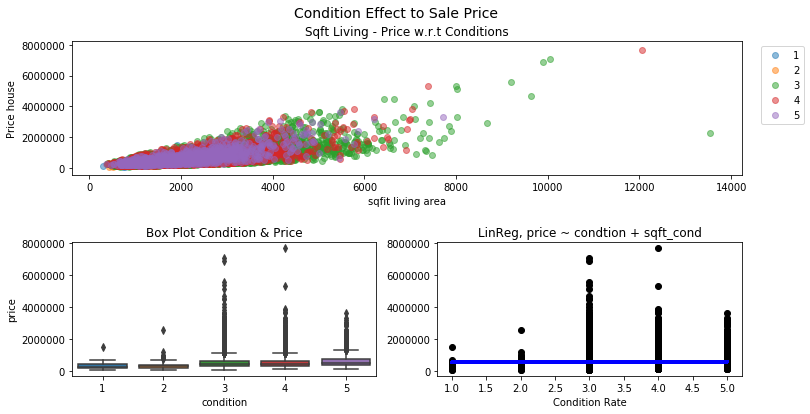

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize = (12,6))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
for val in range(1,6,1):
    indeX = df.condition == val
    ax1.scatter(df.sqft_living.loc[indeX], df.price.loc[indeX], label = val, alpha=0.5)
ax1.legend(bbox_to_anchor = [1.1, 1])
ax1.set_xlabel('sqfit living area')
ax1.set_ylabel('Price house')
ax1.set_title('Sqft Living - Price w.r.t Conditions')

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = 'condition', y = 'price', data = df, ax = ax2)
ax2.set_title('Box Plot Condition & Price', fontsize = 12)

ax3 = plt.subplot2grid((2,2), (1,1))
cubicQual = df.groupby(['condition'])['price'].mean().round(0)
testTrain = df.loc[:, ['condition', 'price']].copy()
testTrain['sqCond'] = np.power(testTrain['condition'],2)
mdl = linear_model.LinearRegression()
mdl.fit(testTrain[['condition', 'sqCond']], testTrain['price'])
y_pred = mdl.predict(testTrain[['condition', 'sqCond']])
print("Mean squared error: %.2f" % mean_squared_error(y_pred, testTrain.price))
# Plot outputs
ax3.scatter(testTrain['condition'], testTrain['price'],  color='black')
ax3.plot(testTrain['condition'], y_pred, color='blue', linewidth=3)
ax3.set_title('LinReg, price ~ condtion + sqft_cond', fontsize = 12)
ax3.set_xlabel('Condition Rate')
plt.subplots_adjust(hspace = 0.5, top = 0.9)
plt.suptitle('Condition Effect to Sale Price', fontsize = 14)
plt.show()

Mean squared error: 112971203793.79


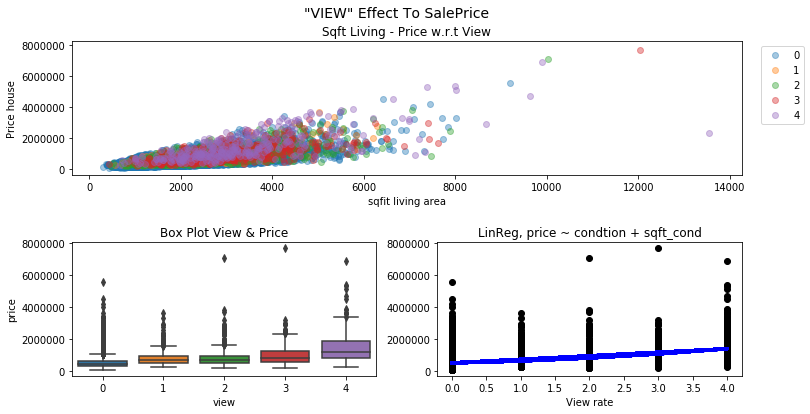

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize = (12,6))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)

for val in range(0,5,1):
    indeX = df.view == val
    ax1.scatter(df.sqft_living.loc[indeX], df.price.loc[indeX], label = val, alpha=0.4)
ax1.legend(bbox_to_anchor = [1.1, 1])
ax1.set_xlabel('sqfit living area')
ax1.set_ylabel('Price house')
ax1.set_title('Sqft Living - Price w.r.t View')

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = 'view', y = 'price', data = df, ax = ax2)
ax2.set_title('Box Plot View & Price', fontsize = 12)

ax3 = plt.subplot2grid((2,2), (1,1))
cubicV = df.groupby(['view'])['price'].mean().round(0)
testTrain = df.loc[:, ['view', 'price']].copy()
testTrain['sqview'] = np.power(testTrain['view'],2)
mdl = linear_model.LinearRegression()
mdl.fit(testTrain[['view', 'sqview']], testTrain['price'])
y_pred = mdl.predict(testTrain[['view', 'sqview']])
print("Mean squared error: %.2f" % mean_squared_error(y_pred, testTrain.price))
# Plot outputs
ax3.scatter(testTrain['view'], testTrain['price'],  color='black')
ax3.plot(testTrain['view'], y_pred, color='blue', linewidth=3)
ax3.set_title('LinReg, price ~ condtion + sqft_cond', fontsize = 12)
ax3.set_xlabel('View rate')
plt.subplots_adjust(hspace = 0.5, top = 0.9)
plt.suptitle('"VIEW" Effect To SalePrice', fontsize = 14)
plt.show()

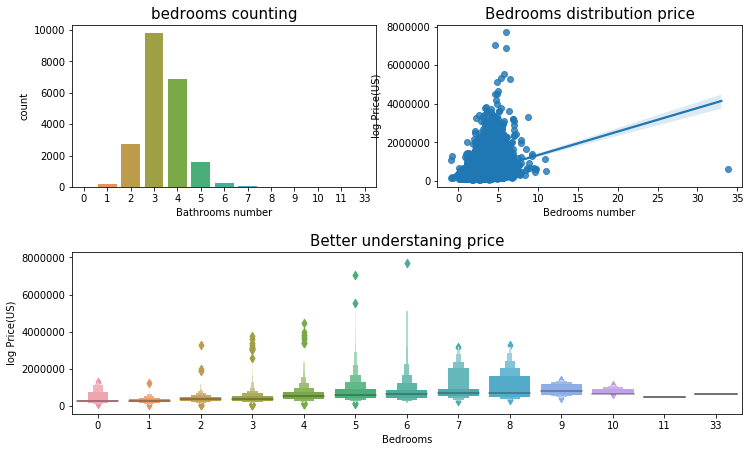

In [15]:
bedrooms = df.bedrooms.value_counts()


plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)


ax1 = plt.subplot(221)
ax1 = sns.countplot(x="bedrooms", data=df,
                    ax=ax1)
ax1.set_title("bedrooms counting", fontsize=15)
ax1.set_xlabel("Bathrooms number")
ax1.set_ylabel("count")

ax2 = plt.subplot(222)
ax2 = sns.regplot(x="bedrooms", y='price', 
                  data=df, ax=ax2, x_jitter=True)
ax2.set_title("Bedrooms distribution price", fontsize=15)
ax2.set_xlabel("Bedrooms number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.boxenplot(x="bedrooms", y="price",
                    data=df)
ax0.set_title("Better understaning price", fontsize=15)
ax0.set_xlabel("Bedrooms")
ax0.set_ylabel("log Price(US)")

plt.show()

Floors counting description
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64


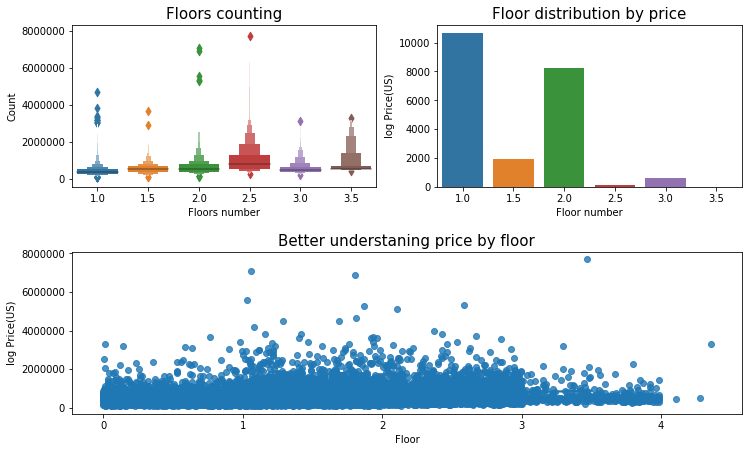

In [16]:
print("Floors counting description")
print(df['floors'].value_counts())


plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.boxenplot(x="floors", y='price', 
                    data=df, ax=ax1, )
ax1.set_title("Floors counting", fontsize=15)
ax1.set_xlabel("Floors number")
ax1.set_ylabel("Count")

ax2 = plt.subplot(222)
ax2 = sns.countplot(x="floors",
                  data=df, ax=ax2)
ax2.set_title("Floor distribution by price", fontsize=15)
ax2.set_xlabel("Floor number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.regplot(x="floors", y="price", #I need to change floors by sqft_living and hue bye floors
                    data=df, x_jitter=True)
ax0.set_title("Better understaning price by floor", fontsize=15)
ax0.set_xlabel("Floor")
ax0.set_ylabel("log Price(US)")

plt.show()

<Figure size 864x576 with 0 Axes>

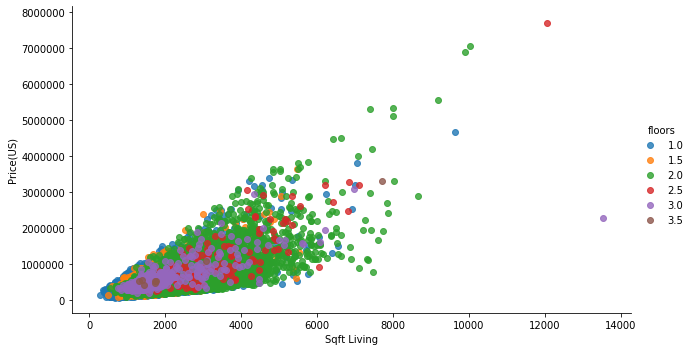

In [17]:
plt.figure(figsize = (12,8))
g=sns.lmplot(x="sqft_living", y="price", aspect=1.8,
                    data=df, hue="floors", fit_reg=False)
g.set_titles("Floors by sqft_living and price", fontsize=15)
g.set_xlabels("Sqft Living")
g.set_ylabels("Price(US)")
plt.show()

Grade counting description
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


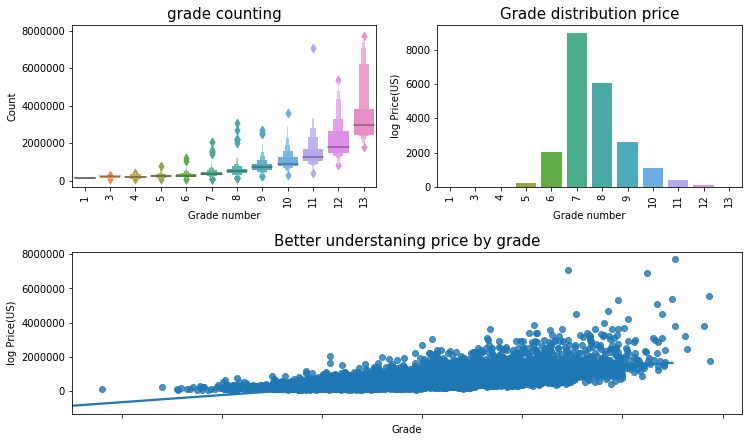

In [18]:
print("Grade counting description")
print(df['grade'].value_counts())


plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.boxenplot(x="grade", y='price', 
                    data=df, ax=ax1, )
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("grade counting", fontsize=15)
ax1.set_xlabel("Grade number")
ax1.set_ylabel("Count")

ax2 = plt.subplot(222)
ax2 = sns.countplot(x="grade",
                  data=df, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Grade distribution price", fontsize=15)
ax2.set_xlabel("Grade number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.regplot(x="grade", y="price",
                    data=df, x_jitter=True)
ax0.set_title("Better understaning price by grade", fontsize=15)
ax0.set_xlabel("Grade")
ax0.set_ylabel("log Price(US)")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)

plt.show()

In [19]:
#Clearly view of bathrooms and bedrooms correlation

bath = ['bathrooms', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[bath[0]], df[bath[1]]).style.background_gradient(cmap = cm)

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
bathrooms,,,,,,,,,,,,,
0,7,4,2,0,1,0,0,0,0,0,0,0,0
1,2,167,1587,1800,327,43,6,1,0,0,0,0,0
2,4,28,1129,7186,4709,695,90,7,1,0,1,0,1
3,0,0,41,656,1219,506,88,7,6,2,1,1,0
4,0,0,1,182,601,321,72,17,4,3,0,0,0
5,0,0,0,0,19,22,12,2,1,0,1,0,0
6,0,0,0,0,6,13,2,2,1,0,0,0,0
7,0,0,0,0,0,1,0,1,0,0,0,0,0
8,0,0,0,0,0,0,2,1,0,1,0,0,0


In [20]:

bath_cond = ['bathrooms', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[bath_cond[0]], df[bath_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
bathrooms,,,,,
0,1,1,9,3,0
1,20,91,2211,1300,311
2,9,75,9000,3702,1065
3,0,5,1713,553,256
4,0,0,1026,109,66
5,0,0,46,8,3
6,0,0,21,3,0
7,0,0,2,0,0
8,0,0,3,1,0


In [21]:
bed_cond = ['bedrooms', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[bed_cond[0]], df[bed_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
bedrooms,,,,,
0,1,1,10,1,0
1,4,11,124,48,12
2,12,51,1779,718,200
3,8,69,6308,2711,728
4,4,36,4580,1682,580
5,0,1,1031,418,151
6,1,3,158,87,23
7,0,0,25,9,4
8,0,0,8,3,2


In [22]:
cond_water = ['condition', 'waterfront']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[cond_water[0]], df[cond_water[1]]).style.background_gradient(cmap = cm)

waterfront,0,1
condition,,
1,29,1
2,171,1
3,13940,91
4,5629,50
5,1681,20


In [23]:
grade_cond = ['grade', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[grade_cond[0]], df[grade_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
grade,,,,,
1,1,0,0,0,0
3,0,1,1,0,1
4,1,5,13,10,0
5,9,15,100,84,34
6,11,59,1035,685,248
7,6,75,5234,2833,833
8,2,13,4269,1394,390
9,0,2,2041,446,126
10,0,2,921,156,55


In [24]:
grade_bed = ['grade', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[grade_bed[0]], df[grade_bed[1]]).style.background_gradient(cmap = cm)

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
grade,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,0,0,0,0,0,0,0,0,0
4,2,12,14,1,0,0,0,0,0,0,0,0,0
5,0,37,114,62,21,5,3,0,0,0,0,0,0
6,0,78,824,854,233,41,7,1,0,0,0,0,0
7,6,52,1205,4917,2177,501,98,11,6,4,2,1,1
8,3,14,499,2796,2194,455,90,12,4,1,0,0,0
9,0,2,78,832,1351,313,33,4,1,0,1,0,0
10,0,1,21,296,615,173,22,5,1,0,0,0,0


In [25]:
grade_bath = ['grade', 'bathrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[grade_bath[0]], df[grade_bath[1]]).style.background_gradient(cmap = cm)

bathrooms,0,1,2,3,4,5,6,7,8
grade,,,,,,,,,
1,1,0,0,0,0,0,0,0,0
3,2,1,0,0,0,0,0,0,0
4,0,28,1,0,0,0,0,0,0
5,1,204,36,1,0,0,0,0,0
6,2,1441,574,18,3,0,0,0,0
7,4,2104,6216,575,75,6,0,0,1
8,3,145,4788,882,244,4,2,0,0
9,0,9,1671,629,303,3,0,0,0
10,0,0,480,309,333,11,1,0,0


## Correlation matrix

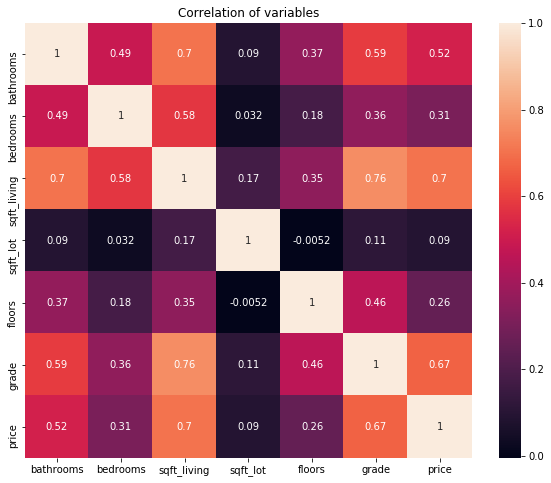

In [26]:
corr = df[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

## Year built distribuition

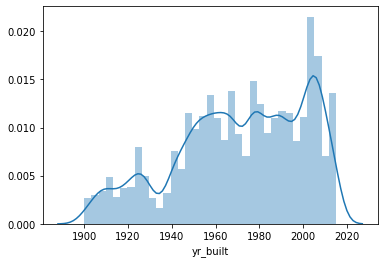

In [27]:
sns.distplot(df['yr_built'])

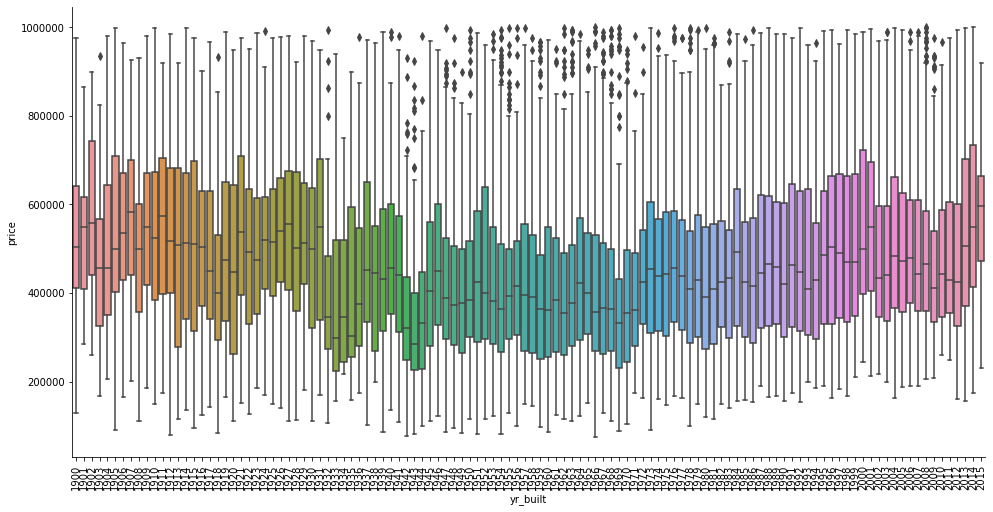

In [28]:
g = sns.catplot(x="yr_built", y = "price", data=df[df['price'] < 1000000], 
                   height= 7, aspect = 2, kind="box" )
g.set_xticklabels(rotation=90)
plt.show()

In [29]:
df = df.merge(pd.get_dummies(df.floors, drop_first=True, prefix='Floors'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.waterfront, drop_first=True, prefix='watFront'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.view, drop_first=True, prefix='View'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.condition, drop_first=True, prefix='Cond'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.grade, prefix='Grade'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.bedrooms, drop_first=True, prefix='Bedrooms'), left_index=True, right_index=True)

In [30]:
del df['floors'],
del df['waterfront']
del df['view']
del df['condition']
del df['grade']
del df['bedrooms']

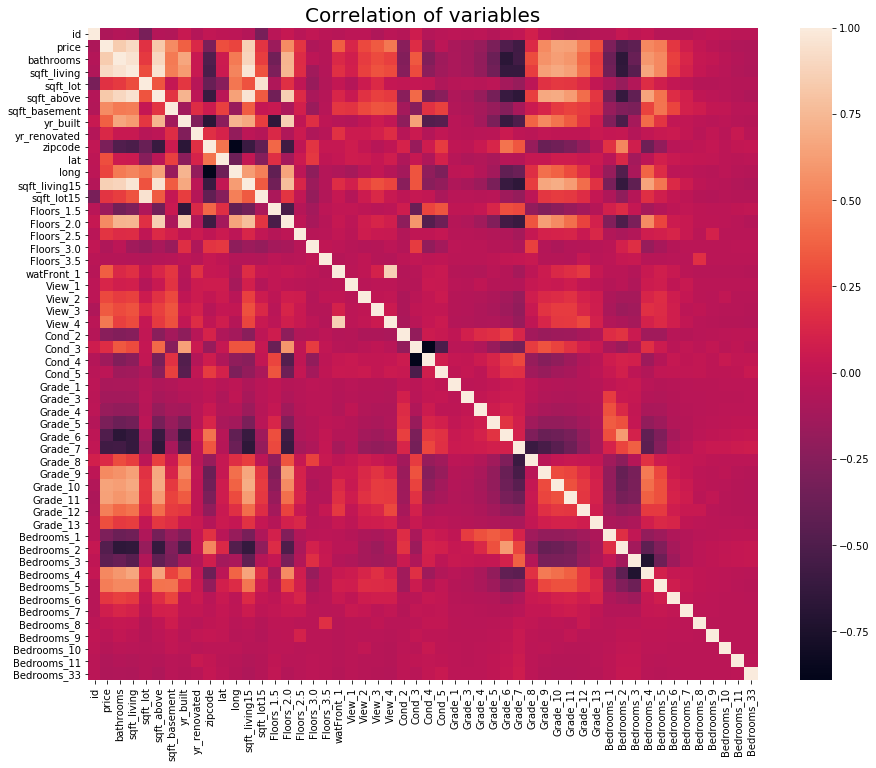

In [31]:
plt.figure(figsize=(15,12))
plt.title('Correlation of variables', fontsize=20)
sns.heatmap(df.corr().astype(float).corr(),vmax=1.0)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

In [33]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

In [34]:
df.drop(['id', 'date'], axis=1, inplace=True)
X = df.drop("price",axis=1).values
y = df["price"].values

In [35]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

### Selecting the most important features

In [47]:
thresh = 5 * 10**(-3)
model = XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# eval model
select_X_val = selection.transform(X_test)
# test 
select_X_test = selection.transform(X_test)

### Creating the pipeline with the models to we do a first evaluate of their power to this problem

Scaled_Ridge: 0.727431 (+/- 0.009924)
Scaled_Lasso: 0.683566 (+/- 0.013035)
Scaled_Elastic: 0.700632 (+/- 0.009749)
Scaled_SVR: 0.671598 (+/- 0.009346)
Scaled_RF_reg: 0.868115 (+/- 0.010678)
Scaled_ET_reg: 0.873234 (+/- 0.011494)
Scaled_BR_reg: 0.847559 (+/- 0.013386)
Scaled_Hub-Reg: 0.701841 (+/- 0.009565)
Scaled_BayRidge: 0.727563 (+/- 0.009940)
Scaled_XGB_reg: 0.856188 (+/- 0.006032)
Scaled_DT_reg: 0.734013 (+/- 0.031810)
Scaled_KNN_reg: 0.716625 (+/- 0.020929)
Scaled_Gboost-Reg: 0.857853 (+/- 0.008397)
Scaled_RFR_PCA: 0.645886 (+/- 0.019619)
Scaled_XGBR_PCA: 0.657901 (+/- 0.017554)


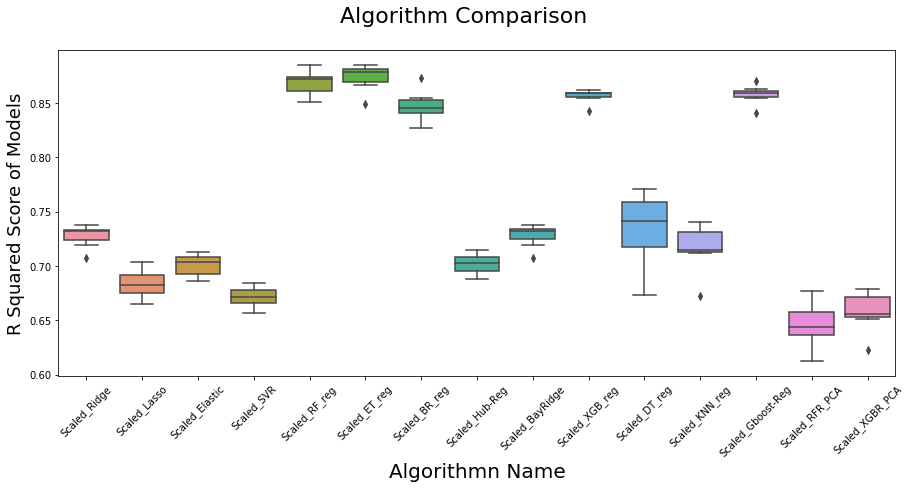

In [37]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Very cool results! 

We can see that we got good models with a good r2 score. 

>All RandomForestRegression, ExtraTreesRgressor, BaggingRegressor and XGBRegressor have r2 higher than 0.80

I will set hyper parameters to the best models and try increase this score 

## Testing the best models 

### XGBoost Regressor

In [38]:
xgb = XGBRegressor(objective ='reg:squarederror',n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [39]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.75, verbosity=1)

In [40]:
y_hat = xgb.predict(X_test)

In [41]:
xgb.score(X_test,y_test)

0.8938452606979226

Excellent result of XGB Regressor with some arbitrary params. 

### Randominzed Search in RandomForest Regressor

In [42]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## Using Random Search to find the best Hyper Parameters

In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [44]:
#Knowing the best parameters
rf_random.best_params_

{'n_estimators': 157,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [50]:
# Predicting with best params
y_hat_Search = rf_random.predict(X_test)


Random Forest Score:  0.880822431682647


## Printing the difference between the 2 models scores

In [52]:
print("XGBoost Regressor R2-score: {}".format(round(r2_score(y_hat, y_test),4)))
print("RandomForest Regressor Prediction R2-score: {}".format(round(r2_score(y_hat_Search, y_test),4)))
print("\nMSE of XGBoost Regressor: {}".format(median_absolute_error(y_hat, y_test)))
print("MSE of RandomForest Regressor: {} ".format(median_absolute_error(y_hat_Search, y_test)))

XGBoost Regressor R2-score: 0.8724
RandomForest Regressor Prediction R2-score: 0.8545

MSE of XGBoost Regressor: 40211.765625
MSE of RandomForest Regressor: 39935.995261072996 


In [53]:
print("XG Boost Score: ", xgb.score(X_test,y_test))
print("Random Forest Score: ", rf_random.score(X_test, y_test))

XG Boost Score:  0.8938452606979226
Random Forest Score:  0.880822431682647


## References

- [HouseSales Headers Explained](https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/82135)
- [Predicting House Prices](https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices)